In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [ ]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

In [ ]:
#Dividing the data into training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.
x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [ ]:
# Normalizing Pixel Values
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


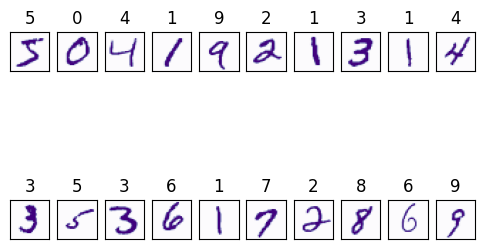

In [ ]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.
fig=plt.figure(figsize=(6,4))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Purples')
    ax.set_title(y_train[i])

In [ ]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [ ]:
#BUILDING NEURAL NETWORK THAT CAN READ HANDWRITTEN DIGITS.
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


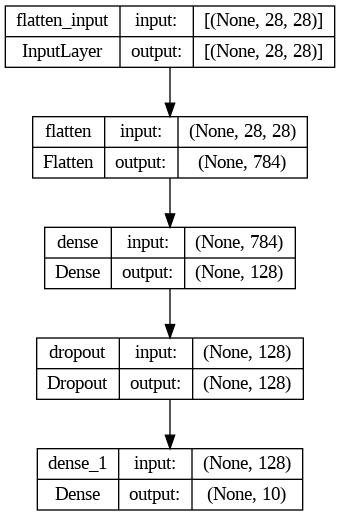

In [ ]:
# Displaying Neural Network Model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

In [ ]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.5291648 , -0.03299361, -0.83502054,  0.10935998, -0.22694707,
        -0.39195147,  0.2062108 ,  0.448164  ,  0.5147318 ,  0.14869733]],
      dtype=float32)

In [ ]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.15002137, 0.08550881, 0.03834378, 0.09859031, 0.07043328,
        0.05971967, 0.10861655, 0.13834865, 0.14787167, 0.10254588]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [ ]:
#MODEL FITTING
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2991 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1422 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1065 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0865 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0755 - accuracy: 0.9765


In [ ]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.6534903e-09, 2.1792847e-08, 5.0262342e-06, 2.8963095e-05,
        2.2175712e-12, 1.7468804e-07, 2.0481417e-13, 9.9996519e-01,
        1.8344000e-08, 5.6049163e-07],
       [1.5214542e-09, 1.1046693e-03, 9.9872202e-01, 1.7253045e-04,
        4.1632450e-16, 5.7071543e-07, 8.2456417e-08, 8.9945311e-14,
        6.1953088e-08, 3.4738573e-14],
       [1.6966878e-06, 9.9874699e-01, 1.5794538e-04, 7.2189803e-05,
        1.0768500e-05, 2.8132263e-05, 2.5270754e-05, 5.3937297e-04,
        4.1713196e-04, 4.1622090e-07],
       [9.9996698e-01, 2.8729104e-08, 2.4728349e-06, 2.0722895e-08,
        6.1868434e-08, 6.4590733e-07, 2.1903412e-05, 6.3507318e-06,
        1.6077542e-10, 1.5743589e-06],
       [6.9643676e-08, 2.7991980e-11, 4.0230492e-07, 5.5805685e-09,
        9.9852449e-01, 8.2454100e-08, 8.8228735e-06, 1.0134400e-05,
        3.4336912e-07, 1.4555653e-03]], dtype=float32)>

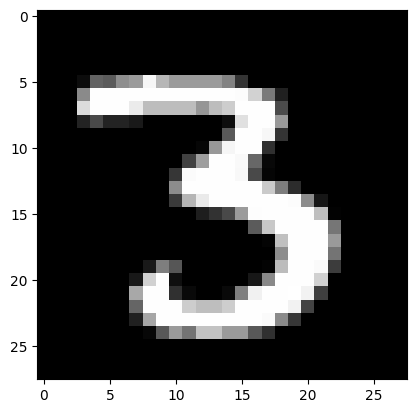

In [ ]:
# Displaying a Grayscale Image
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 97ms/step
predicted : 3
